In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/kc_house_data.csv').dropna()
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
X = data.drop(columns=['id','date','zipcode'])
y = data['price']

In [ ]:
#Memisahkan data menjadi train dan val

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)

In [ ]:
#Memisahkan data menjadi train, val, test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

In [ ]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_val_std = std.transform(X_val)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotUniform(seed=40), activation='tanh'))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(8, kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(1, activation='relu'))

In [ ]:
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.15),
              metrics='mae')

In [ ]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 64)                1216      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_109 (Dense)           (None, 32)                2080      
                                                                 
 activation_18 (Activation)  (None, 32)                0         
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_110 (Dense)           (None, 16)                528       
                                                                 
 activation_19 (Activation)  (None, 16)              

In [ ]:
history = model.fit(X_train_std, y_train, epochs=20, batch_size=64,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/20
271/271 [==============================] - 2s 4ms/step - loss: 61344690176.0000 - mae: 149721.1875 - val_loss: 23925190656.0000 - val_mae: 75887.9297
Epoch 2/20
271/271 [==============================] - 1s 3ms/step - loss: 34345725952.0000 - mae: 118010.5625 - val_loss: 18281883648.0000 - val_mae: 71764.7500
Epoch 3/20
271/271 [==============================] - 1s 3ms/step - loss: 33283682304.0000 - mae: 114472.1406 - val_loss: 26167412736.0000 - val_mae: 80524.6953
Epoch 4/20
271/271 [==============================] - 1s 3ms/step - loss: 29637728256.0000 - mae: 111569.9375 - val_loss: 13859438592.0000 - val_mae: 55394.2812
Epoch 5/20
271/271 [==============================] - 1s 3ms/step - loss: 28860348416.0000 - mae: 111669.6172 - val_loss: 16635799552.0000 - val_mae: 58931.6055
Epoch 6/20
271/271 [==============================] - 1s 3ms/step - loss: 32813477888.0000 - mae: 114042.5078 - val_loss: 39247425536.0000 - val_mae: 109013.0469
Epoch 7/20
271/271 [=============

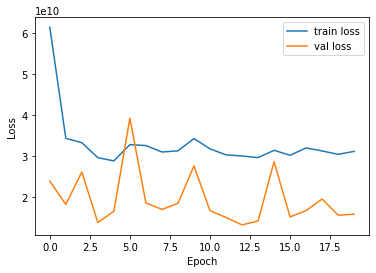

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(20),history.history['loss'],label='train loss')
ax.plot(range(20),history.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()